# Celebrities classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../datasets/celeba-dataset/list_attr_celeba.csv")
data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [3]:
data.shape

(202599, 41)

In [10]:
val_data = pd.read_csv("../datasets/celeba-dataset/list_eval_partition.csv")
val_data[val_data["partition"] == 1].shape

(19867, 2)

In [14]:
train_data = data[val_data["partition"] == 0]
test_data = data[val_data["partition"] == 1]
validation_data = data[val_data["partition"] == 2]

In [15]:
train_data.shape, test_data.shape, validation_data.shape

((162770, 41), (19867, 41), (19962, 41))

In [16]:
img_dir = "../datasets/celeba-dataset/img_align_celeba"

In [17]:
img = os.listdir(img_dir)[0]
img_path = os.path.join(img_dir, img)

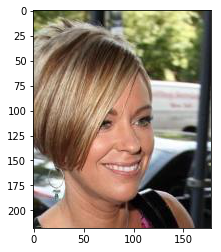

In [18]:
plt.imshow(plt.imread(img_path))

In [19]:
train_data["image_id"] = [plt.imread(os.path.join(img_dir, x)) for x in train_data["image_id"]]
test_data["image_id"] = [plt.imread(os.path.join(img_dir, x)) for x in test_data["image_id"]]
validation_data["image_id"] = [plt.imread(os.path.join(img_dir, x)) for x in validation_data["image_id"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

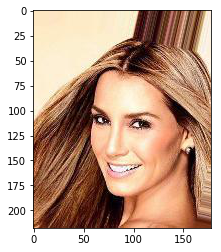

In [20]:
plt.imshow(train_data["image_id"][0])

In [28]:
train_images = np.array(train_data["image_id"])
train_target = np.array(train_data.drop("image_id", axis=1))

validation_images = np.array(validation_data["image_id"])
validation_target = np.array(validation_data.drop("image_id", axis=1))

test_images = np.array(test_data["image_id"])
test_target = np.array(test_data.drop("image_id", axis=1))

In [29]:
train_images[0].shape

(218, 178, 3)

In [47]:
min_width = 9999999
min_height = 9999999
max_width = 0
max_height = 0

for image in train_data["image_id"]:
    if image.shape[1] < min_width:
        min_width = image.shape[1]
    if image.shape[0] < min_height:
        min_height = image.shape[0]
    if image.shape[0] > max_height:
        max_height = image.shape[0]
    if image.shape[1] > max_width:
        max_width = image.shape[0]
        
print("Minimum size: {}x{}".format(min_height, min_width))
print("Maximum size: {}x{}".format(max_height, max_width))

Minimum size: 218x178
Maximum size: 218x218


In [ ]:
train_images = np.array([x.reshape(218,178,3) for x in train_images])
validation_images = np.array([x.reshape(218,178,3) for x in validation_images])
test_images = np.array([x.reshape(218,178,3) for x in test_images])

In [30]:
train_target.shape

(162770, 40)

## CNN

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [36]:
# CNN
# 2 cnn layers, 1 maxpool layer and 3 fully connected layers

cnn = Sequential()

cnn.add(Conv2D(filters=256, kernel_size=(5,5), activation="relu", strides=(3,3), input_shape=(218,178,3)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=256, kernel_size=(5,5), activation="relu", strides=(3,3)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.4))

cnn.add(Flatten())

cnn.add(Dense(units=200, activation="relu"))
cnn.add(BatchNormalization())

cnn.add(Dense(units=100, activation="relu"))
cnn.add(BatchNormalization())

cnn.add(Dense(units=40, activation="tanh"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
cnn.compile(loss="binary_crossentropy", optimizer=Adam(0.01), metrics=["accuracy"])
variable_lr = LearningRateScheduler(lambda x: 1e-3*0.9**x)
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

In [39]:
train = cnn.fit_generator(generator=datagen.flow(x_train, y_train, batch_size=15), 
                          epochs=5, 
                          steps_per_epoch=200, 
                          validation_data=(x_test[:100,], y_test[:100,]), 
                          callbacks=[variable_lr])

ValueError: setting an array element with a sequence.